In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv(
    "../data/ml_ready_dataset_clean.csv",
    parse_dates=["from_date"]
)

print("Shape:", df.shape)
df.head()


Shape: (21180, 26)


,from_date,station_id,Ozone,Benzene,Toluene,RH,PM2.5,PM10,NO,NO2,...,is_secondary_event,is_local_event,hour,day_of_week,is_weekend,is_winter,is_early_month,PM25_lag_1,PM25_lag_6,PM25_lag_24
0,01-01-2025 00:00,Peenya,32.20,0.66,1.84,92.72,47.99,94.19,7.51,15.30,...,0,0,0,2,0,1,1,47.99,47.99,50.29
1,01-01-2025 01:00,Peenya,31.72,0.64,1.89,93.50,48.99,96.16,7.68,17.61,...,0,0,1,2,0,1,1,47.99,47.99,50.29
2,01-01-2025 02:00,Peenya,32.53,0.64,1.88,93.57,50.97,100.04,5.95,17.66,...,0,0,2,2,0,1,1,48.99,47.99,50.29
3,01-01-2025 03:00,Peenya,32.48,0.62,1.88,93.60,48.21,94.63,7.53,16.96,...,0,0,3,2,0,1,1,50.97,47.99,50.29
4,01-01-2025 04:00,Peenya,32.55,0.64,1.88,93.57,45.52,89.35,6.95,15.81,...,0,0,4,2,0,1,1,48.21,47.99,50.29


In [3]:
df = df.sort_values("from_date").reset_index(drop=True)


In [4]:
TARGET = "PM2.5"


In [5]:
non_features = [
    "from_date",    # datetime
    "station_id"    # categorical (we'll handle later)
]


In [6]:
X = df.drop(columns=non_features + [TARGET])
y = df[TARGET]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (21180, 23)
y shape: (21180,)


In [7]:
split_idx = int(0.8 * len(df))

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (16944, 23)
Test size: (4236, 23)


In [8]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [9]:
y_pred = rf.predict(X_test)


In [10]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Baseline Model Performance")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 3))


📊 Baseline Model Performance
MAE : 3.52
RMSE: 5.69
R²  : 0.847


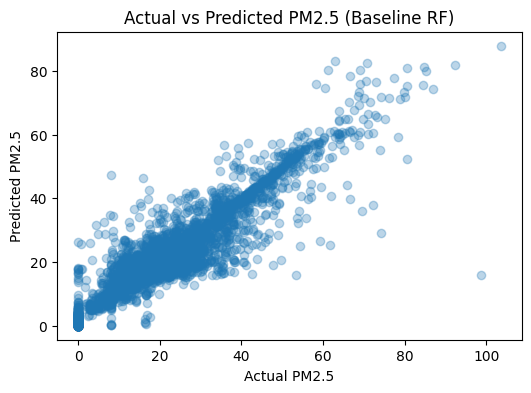

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5 (Baseline RF)")
plt.show()


In [12]:
metrics = {
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2
}

pd.DataFrame([metrics]).to_csv(
    "../results/baseline_rf_metrics.csv",
    index=False
)
